In [1]:
import pandas as pd

#### Convert column to datetime format

In [2]:
df = pd.DataFrame({'a':['2019-01-01 14:13', '2019-02-01 14:13'],
                  'b':[1546351980, 1549030380]})
df

,a,b
0,2019-01-01 14:13,1546351980
1,2019-02-01 14:13,1549030380


In [3]:
df.dtypes

a    object
b     int64
dtype: object

In [4]:
df['a_asdate'] = pd.to_datetime(df['a'], format='%Y-%m-%d %H:%M')
df['b_asdate'] = pd.to_datetime(df['b'], unit='s')

In [5]:
df

,a,b,a_asdate,b_asdate
0,2019-01-01 14:13,1546351980,2019-01-01 14:13:00,2019-01-01 14:13:00
1,2019-02-01 14:13,1549030380,2019-02-01 14:13:00,2019-02-01 14:13:00


In [6]:
df.dtypes

a                   object
b                    int64
a_asdate    datetime64[ns]
b_asdate    datetime64[ns]
dtype: object

#### date manipulations

In [7]:
df = pd.DataFrame({'dates':pd.date_range(start='1/1/2018', end='1/8/2018')})
df

,dates
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
5,2018-01-06
6,2018-01-07
7,2018-01-08


In [8]:
df.dtypes

dates    datetime64[ns]
dtype: object

In [9]:
df['year'] = df['dates'].dt.year
df['month'] = df['dates'].dt.month
df['day'] = df['dates'].dt.day
df['dayofweek'] = df['dates'].dt.dayofweek
df['weekday_name'] = df['dates'].dt.weekday_name
df['is_leap_year'] = df['dates'].dt.is_leap_year
# see more https://pandas.pydata.org/pandas-docs/version/0.21/api.html#datetimelike-properties

AttributeError: 'DatetimeProperties' object has no attribute 'weekday_name'

In [10]:
df

,dates,year,month,day,dayofweek
0,2018-01-01,2018,1,1,0
1,2018-01-02,2018,1,2,1
2,2018-01-03,2018,1,3,2
3,2018-01-04,2018,1,4,3
4,2018-01-05,2018,1,5,4
5,2018-01-06,2018,1,6,5
6,2018-01-07,2018,1,7,6
7,2018-01-08,2018,1,8,0


#### Filtering

In [11]:
df = pd.DataFrame({'a':[1,1,1,2,2,3,4,5],
                  'b':[10,10,11,20,0,0,40,50],
                  'c':['apple','apple','plum','pear','plum','apple','apple','apple']})
df

,a,b,c
0,1,10,apple
1,1,10,apple
2,1,11,plum
3,2,20,pear
4,2,0,plum
5,3,0,apple
6,4,40,apple
7,5,50,apple


In [12]:
df['a']<3

0     True
1     True
2     True
3     True
4     True
5    False
6    False
7    False
Name: a, dtype: bool

In [13]:
df[df['a']<3]

,a,b,c
0,1,10,apple
1,1,10,apple
2,1,11,plum
3,2,20,pear
4,2,0,plum


In [14]:
df[0:5]

,a,b,c
0,1,10,apple
1,1,10,apple
2,1,11,plum
3,2,20,pear
4,2,0,plum


In [15]:
only_apple = df[df['c']=='apple']
only_apple

,a,b,c
0,1,10,apple
1,1,10,apple
5,3,0,apple
6,4,40,apple
7,5,50,apple


In [16]:
df[(df['b']==10) & (df['c']=='apple')]

,a,b,c
0,1,10,apple
1,1,10,apple


In [17]:
df[df['a']<df['b']]

,a,b,c
0,1,10,apple
1,1,10,apple
2,1,11,plum
3,2,20,pear
6,4,40,apple
7,5,50,apple


#### Grouping

In [18]:
movies = pd.read_csv('movies.csv')
movies

,title,genre,userId,rating,year
0,Daybreakers (2010),Action,18,3.5,(2010)
1,Daybreakers (2010),Action,177,2.5,(2010)
2,Daybreakers (2010),Action,274,3.5,(2010)
3,Daybreakers (2010),Action,381,3.5,(2010)
4,Daybreakers (2010),Action,534,4.0,(2010)
...,...,...,...,...,...
7172,Gintama: The Movie (2010),Action,184,3.5,(2010)
7173,Silver Spoon (2014),Comedy,184,4.0,(2014)
7174,Black Butler: Book of the Atlantic (2017),Action,184,4.0,(2017)
7175,Flint (2017),Drama,184,3.5,(2017)


In [19]:
movies.groupby('title').size()

title
'71 (2014)                                     1
10 Years (2011)                                1
100 Streets (2016)                             1
12 Years a Slave (2013)                       16
13 Assassins (Jûsan-nin no shikaku) (2010)     4
                                              ..
Zipper (2015)                                  1
Zombeavers (2014)                              2
Zookeeper (2011)                               4
Zoolander 2 (2016)                             3
Zootopia (2016)                               32
Length: 1339, dtype: int64

In [20]:
movies.groupby('title').size().sort_values(ascending=False).head(10)

title
Inception (2010)                   143
Dark Knight Rises, The (2012)       76
Django Unchained (2012)             71
Avengers, The (2012)                69
Shutter Island (2010)               67
Guardians of the Galaxy (2014)      59
King's Speech, The (2010)           58
Social Network, The (2010)          57
Wolf of Wall Street, The (2013)     54
The Hunger Games (2012)             54
dtype: int64

In [21]:
movies.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Bloodsucking Bastards (2015)         5.0
All Yours (2016)                     5.0
Tom Segura: Mostly Stories (2016)    5.0
A Perfect Day (2015)                 5.0
What Men Talk About (2010)           5.0
Name: rating, dtype: float64

In [22]:
movies.groupby('title').agg({'rating':'mean',
                            'userId':'nunique'})

,rating,userId
title,,
'71 (2014),4.000000,1
10 Years (2011),3.500000,1
100 Streets (2016),2.500000,1
12 Years a Slave (2013),3.625000,16
13 Assassins (Jûsan-nin no shikaku) (2010),4.000000,4
...,...,...
Zipper (2015),2.000000,1
Zombeavers (2014),2.500000,2
Zookeeper (2011),2.750000,4


In [23]:
ratings = movies.groupby('title').agg({'rating':'mean',
                            'userId':'nunique'}).rename(columns={'rating':'rating_mean',
                                                                'userId':'nb_rating'})

In [24]:
ratings.sort_values('rating_mean', ascending=False).head()

,rating_mean,nb_rating
title,,
Bloodsucking Bastards (2015),5.0,1
All Yours (2016),5.0,1
Tom Segura: Mostly Stories (2016),5.0,1
A Perfect Day (2015),5.0,1
What Men Talk About (2010),5.0,1


In [25]:
ratings[ratings['nb_rating']>50].sort_values('rating_mean', ascending=False).head()

,rating_mean,nb_rating
title,,
Inception (2010),4.066434,143
Guardians of the Galaxy (2014),4.050847,59
"King's Speech, The (2010)",4.043103,58
Shutter Island (2010),4.022388,67
"Dark Knight Rises, The (2012)",3.993421,76


#### Bar Plot

In [26]:
%matplotlib inline

In [27]:
ratings_by_genre = movies.groupby('genre')['rating'].mean()
ratings_by_genre

genre
Action    3.459843
Comedy    3.378001
Drama     3.611188
Name: rating, dtype: float64

<AxesSubplot:xlabel='genre'>

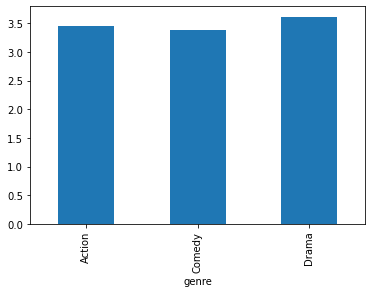

In [28]:
ratings_by_genre.plot(kind='bar')

<AxesSubplot:xlabel='genre'>

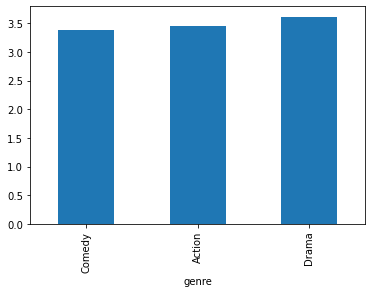

In [29]:
ratings_by_genre.sort_values().plot(kind='bar')

<AxesSubplot:title={'center':'Mean raging by genre'}, xlabel='genre'>

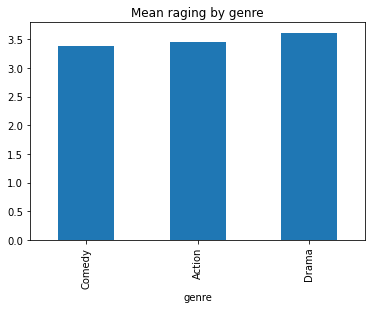

In [30]:
ratings_by_genre.sort_values().plot(kind='bar', title='Mean raging by genre')

<AxesSubplot:title={'center':'Mean raging by genre'}, xlabel='genre'>

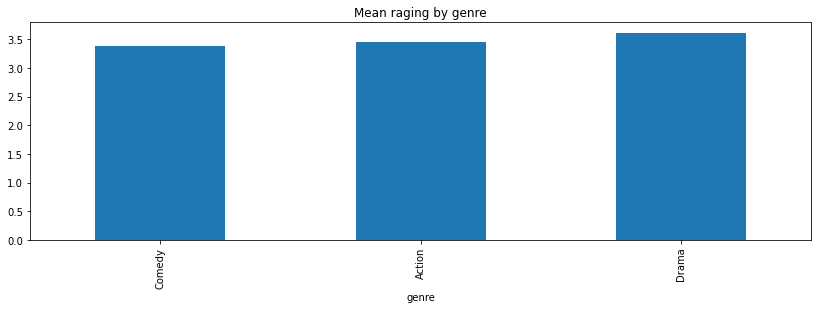

In [31]:
ratings_by_genre.sort_values().plot(kind='bar', title='Mean raging by genre', figsize=(14,4))

<AxesSubplot:title={'center':'Mean raging by genre'}, xlabel='genre'>

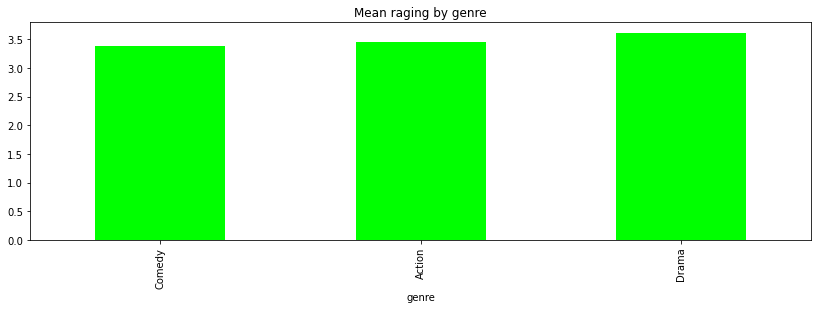

In [32]:
ratings_by_genre.sort_values().plot(kind='bar', title='Mean raging by genre', figsize=(14,4), color='lime')

<AxesSubplot:title={'center':'Mean raging by genre'}, xlabel='genre'>

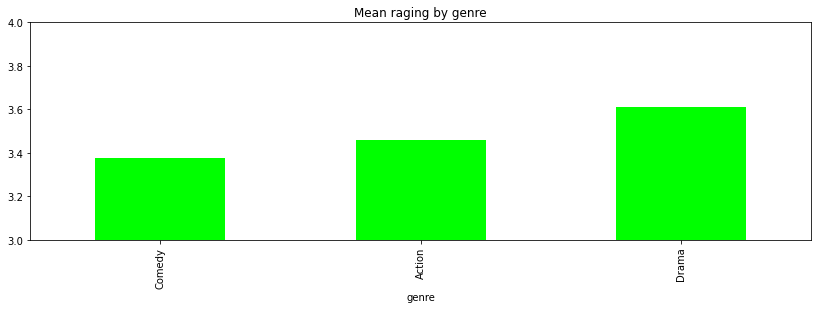

In [33]:
ratings_by_genre.sort_values().plot(kind='bar', title='Mean raging by genre', figsize=(14,4), color='lime', ylim=[3,4])

#### Pivoting

In [34]:
by_year_genre = movies.groupby(['year','genre'])['rating'].mean()

In [35]:
by_year_genre.head()

year    genre 
(2010)  Action    3.506512
        Comedy    3.330677
        Drama     3.772727
(2011)  Action    3.411215
        Comedy    3.478372
Name: rating, dtype: float64

In [36]:
by_year_genre = movies.groupby(['year','genre'])['rating'].mean().reset_index()

In [37]:
by_year_genre.head()

,year,genre,rating
0,(2010),Action,3.506512
1,(2010),Comedy,3.330677
2,(2010),Drama,3.772727
3,(2011),Action,3.411215
4,(2011),Comedy,3.478372


In [38]:
by_year_genre.sort_values('year', inplace=True)

In [39]:
by_year_genre

,year,genre,rating
0,(2010),Action,3.506512
1,(2010),Comedy,3.330677
2,(2010),Drama,3.772727
3,(2011),Action,3.411215
4,(2011),Comedy,3.478372
5,(2011),Drama,3.541667
6,(2012),Action,3.546898
7,(2012),Comedy,3.337413
8,(2012),Drama,3.679739
9,(2013),Action,3.336842


In [40]:
pivoted_df = by_year_genre.pivot(index='year', columns='genre', values='rating')

In [41]:
pivoted_df.head()

genre,Action,Comedy,Drama
year,,,
(2010),3.506512,3.330677,3.772727
(2011),3.411215,3.478372,3.541667
(2012),3.546898,3.337413,3.679739
(2013),3.336842,3.440574,3.666667
(2014),3.489544,3.358779,3.626033


#### plotting groups

<AxesSubplot:title={'center':'Average ratings by year of premiere and genre'}, xlabel='year'>

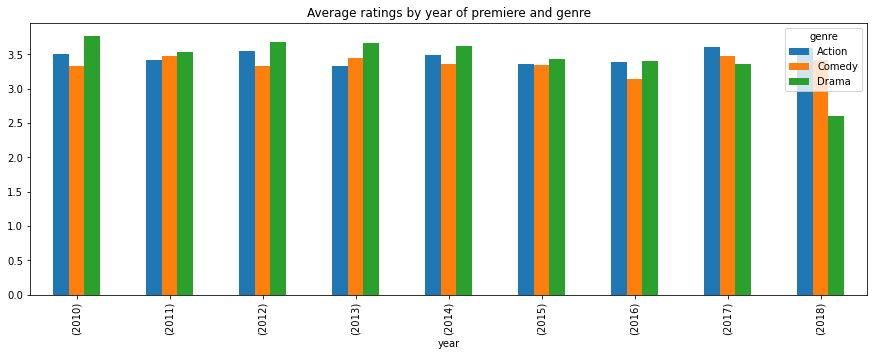

In [42]:
pivoted_df.plot(kind='bar', figsize=(15,5), title='Average ratings by year of premiere and genre')

<AxesSubplot:title={'center':'Average ratings by year of premiere and genre'}, xlabel='year'>

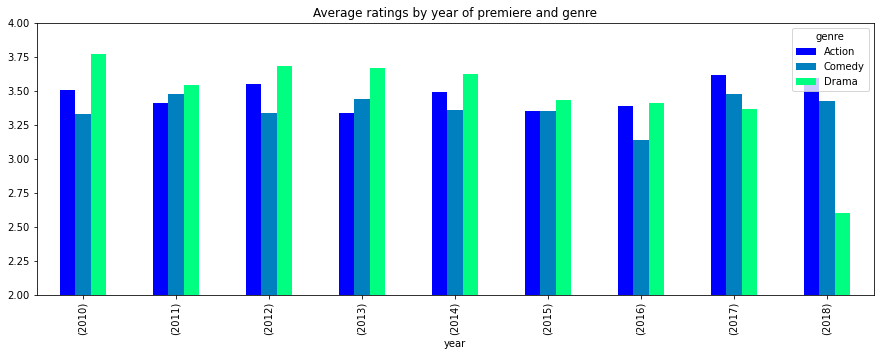

In [43]:
pivoted_df.plot(kind='bar', 
                figsize=(15,5), 
                title='Average ratings by year of premiere and genre',
                ylim=[2,4],
               colormap='winter')

#### Figures with multiple plots

In [44]:
import matplotlib.pyplot as plt

In [45]:
by_year_genre2 = movies.groupby(['year','genre'])['userId'].nunique().reset_index().sort_values('year')
by_year_genre2

,year,genre,userId
0,(2010),Action,176
1,(2010),Comedy,82
2,(2010),Drama,136
3,(2011),Action,113
4,(2011),Comedy,99
5,(2011),Drama,82
6,(2012),Action,142
7,(2012),Comedy,75
8,(2012),Drama,71
9,(2013),Action,85


In [46]:
pivoted_df2 = by_year_genre2.pivot(index='year', columns='genre', values='userId')
pivoted_df2

genre,Action,Comedy,Drama
year,,,
(2010),176,82,136
(2011),113,99,82
(2012),142,75,71
(2013),85,77,67
(2014),99,75,87
(2015),86,46,57
(2016),76,36,37
(2017),48,15,25
(2018),21,10,4


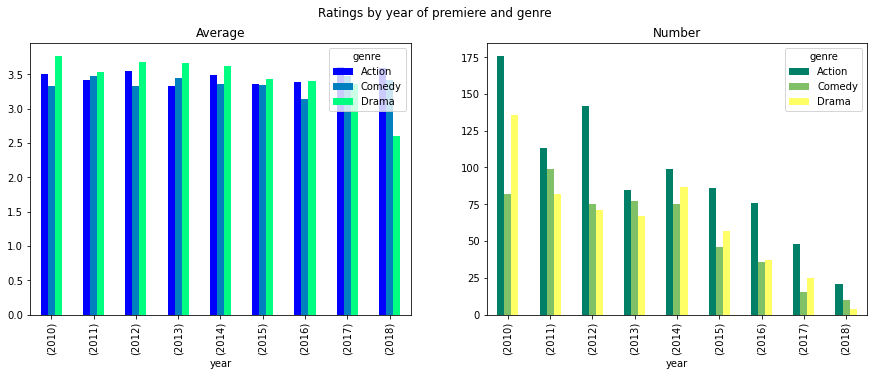

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.suptitle('Ratings by year of premiere and genre')
pivoted_df.plot(kind='bar',  
                title='Average',
                colormap='winter',
                ax=axes[0]
                )
pivoted_df2.plot(kind='bar', 
                figsize=(15,5), 
                title='Number',
               colormap='summer',
               ax=axes[1])
plt.show()

In [48]:
pivoted_df[pivoted_df.index.isin(['(2010)', '(2011)'])]

genre,Action,Comedy,Drama
year,,,
(2010),3.506512,3.330677,3.772727
(2011),3.411215,3.478372,3.541667


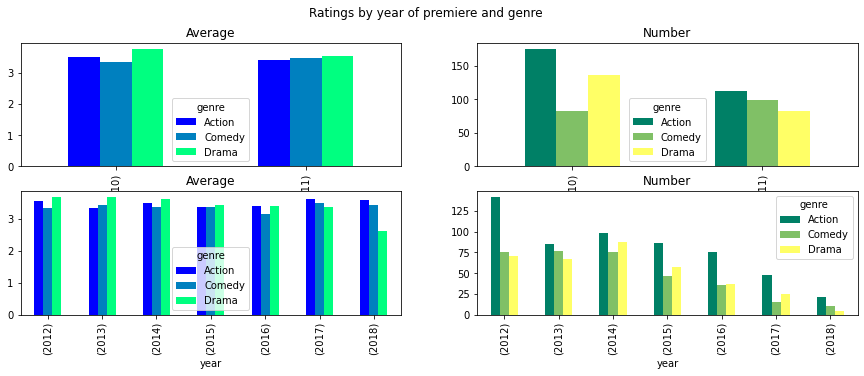

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.suptitle('Ratings by year of premiere and genre')
pivoted_df[pivoted_df.index.isin(['(2010)', '(2011)'])].plot(kind='bar', 
                title='Average',
                colormap='winter',
                ax=axes[0,0]
                )
pivoted_df2[pivoted_df.index.isin(['(2010)', '(2011)'])].plot(kind='bar', 
                title='Number',
               colormap='summer',
               ax=axes[0,1])
pivoted_df[~pivoted_df.index.isin(['(2010)', '(2011)'])].plot(kind='bar', 
                title='Average',
                colormap='winter',
                ax=axes[1,0]
                )
pivoted_df2[~pivoted_df.index.isin(['(2010)', '(2011)'])].plot(kind='bar', 
                figsize=(15,5), 
                title='Number',
               colormap='summer',
               ax=axes[1,1])
plt.show()

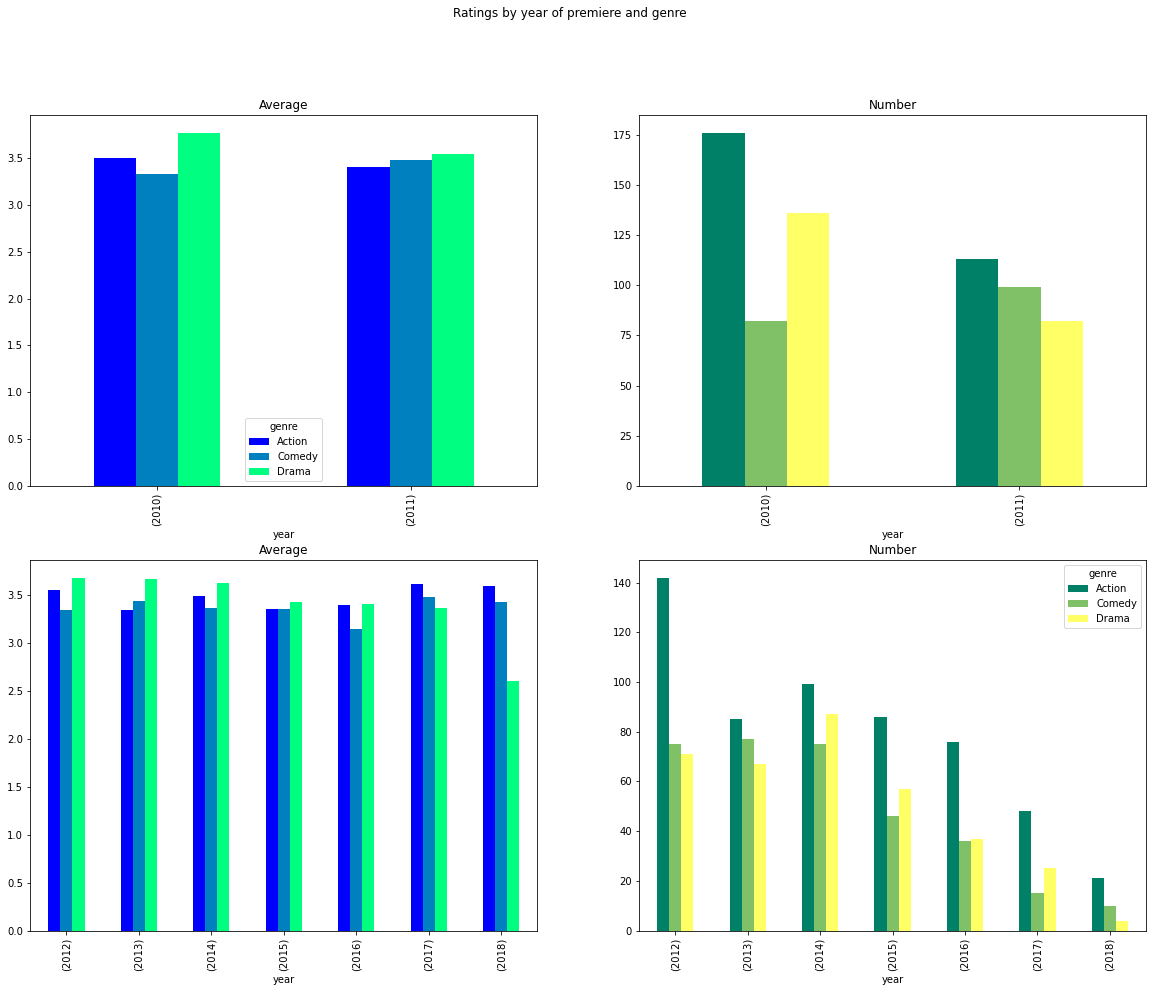

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.suptitle('Ratings by year of premiere and genre')
pivoted_df[pivoted_df.index.isin(['(2010)', '(2011)'])].plot(kind='bar', 
                title='Average',
                colormap='winter',
                ax=axes[0,0]
                )
pivoted_df2[pivoted_df.index.isin(['(2010)', '(2011)'])].plot(kind='bar', 
                title='Number',
               colormap='summer',
                legend=False,
               ax=axes[0,1])
pivoted_df[~pivoted_df.index.isin(['(2010)', '(2011)'])].plot(kind='bar', 
                title='Average',
                colormap='winter',
                legend=False,
                ax=axes[1,0]
                )
pivoted_df2[~pivoted_df.index.isin(['(2010)', '(2011)'])].plot(kind='bar', 
                figsize=(20,15), 
                title='Number',
               colormap='summer',
               ax=axes[1,1])
plt.show()

## Exercise

#### Find out if there is a difference between Subscriber/Customer in daily routine

### 1 - exercise

Load the trip_filled csv into a pandas dataframe. <br>
In the trip dataframe create a new column called 'start_datetime'. These should contain the values from column 'Start Date' converted into datetime. 

In [51]:
import pandas as pd
# df['a_asdate'] = pd.to_datetime(df['a'], format='%Y-%m-%d %H:%M')
trip= pd.read_csv('trip_filled.csv')
trip['start_date'] =pd.to_datetime(trip['Start Date'], format = '%m/%d/%Y %H:%M')
trip

,Trip ID,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,start_date
0,4576,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,2013-08-29 14:13:00
1,4607,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,2013-08-29 14:42:00
2,4130,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,2013-08-29 10:16:00
3,4251,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,2013-08-29 11:29:00
4,4299,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,2013-08-29 12:02:00
...,...,...,...,...,...,...,...,...,...,...
144000,137130,12/28/2013 12:57,Embarcadero at Sansome,60,12/28/2013 13:31,Grant Avenue at Columbus Avenue,73,269,Customer,2013-12-28 12:57:00
144001,137131,12/28/2013 12:57,Embarcadero at Sansome,60,12/28/2013 13:31,Grant Avenue at Columbus Avenue,73,574,Customer,2013-12-28 12:57:00
144002,137132,12/28/2013 12:58,Powell Street BART,39,12/28/2013 13:06,2nd at Folsom,62,527,Subscriber,2013-12-28 12:58:00
144003,137134,12/28/2013 12:58,2nd at Townsend,61,12/28/2013 13:01,San Francisco Caltrain 2 (330 Townsend),69,540,Subscriber,2013-12-28 12:58:00


### 1 - check yourself

In [52]:
if (trip['Start Date'] != trip['start_date'].dt.strftime('%#m/%#d/%Y %#H:%M')).sum() == 0:
    print('start_date column is successfully converted')
else:
    print('start_date column is NOT successfully converted')

start_date column is successfully converted


### 2 - exercise
Create new column called start_hour that contains the hour in which the trip started.

In [53]:
trip['start_hour'] = trip['start_date'].dt.hour
trip.head()

,Trip ID,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,start_date,start_hour
0,4576,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,2013-08-29 14:13:00,14
1,4607,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,2013-08-29 14:42:00,14
2,4130,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,2013-08-29 10:16:00,10
3,4251,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,2013-08-29 11:29:00,11
4,4299,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,2013-08-29 12:02:00,12


### 2 - check yourself

In [54]:
if trip['start_hour'].dtype == 'int64' and trip['start_hour'].min()==0 and trip['start_hour'].max()==23:
    print('start_hour column is successfully converted')
else:
    print('start_hour column is NOT successfully converted')    

start_hour column is successfully converted


### 3 - exercise
First let's check if there is a daily pattern. Group the trip data by the start_hour column and get the size of each group. Assign it to a new variable called by_hour.

In [55]:
by_hour = trip.groupby('start_hour').count()['Trip ID']
by_hour

start_hour
0       620
1       381
2       239
3       110
4       249
5       697
6      2847
7      7902
8     14984
9     12315
10     7260
11     7477
12     9575
13     8833
14     7536
15     8274
16    12446
17    15660
18    11061
19     6182
20     3806
21     2660
22     1789
23     1102
Name: Trip ID, dtype: int64

### 3 - check yourself

In [56]:
if by_hour.index[0]==0 and by_hour[0] == 620:
    print('the grouping was successfull')
else:
    print('the grouping was NOT successfull')   

the grouping was successfull


### 4 - exercise
Make a bar plot from the by_hour data. 
- The x axis should be the hour and the y the number of trips. 
- The chart should have a title
- The chart should be 10 inches wide and 5 inches tall
- The color of the columns should set to something different from the default. (You can find named colors for example here: https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib)

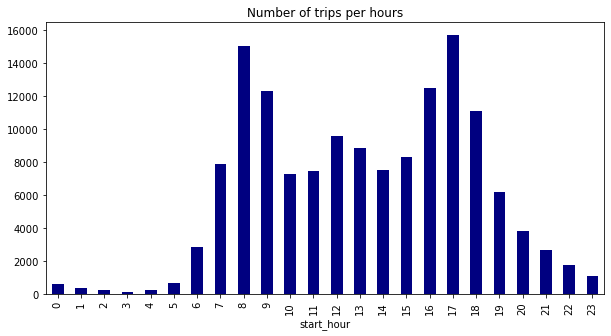

In [57]:
by_hour.plot(kind='bar', title = 'Number of trips per hours', color='navy', figsize=(10,5) );


### 4 - check yourself
Your chart should be similar to this:
<img src="exc4_cahrt.png">

### 5 - exercise
It looks like that the bikes are used most in the morning and in the afternoon. Let's check if this pattern is the same for Customers and Subscriebrs as well! <br>
Group the trip dataframe by Subscription Type ahd start_hour and get the size of each group. Reset the index and assign it to a new dataframe called by_type_hour. <br>
Rename the column with the group size to nb_trips.

In [58]:
by_type_hour = trip.groupby(['Subscription Type', 'start_hour']).count().reset_index(
    )[['start_hour','Subscription Type', 'Trip ID']].rename(columns={'Trip ID':'nb_trips'})

by_type_hour.head()

,start_hour,Subscription Type,nb_trips
0,0,Customer,256
1,1,Customer,193
2,2,Customer,135
3,3,Customer,70
4,4,Customer,45


### 5 - check yourself

In [59]:
if by_type_hour.columns[2] == 'nb_trips' and len(by_type_hour) == 48:
    print('the grouping was successfull')
else:
    print('the grouping was NOT successfull')     

the grouping was successfull


### 6 - exercise
Pivot the by_type_hour dataframe. The pivoted dataframe should be called by_type_hour_pivot. The indeces should be the hours, the columns the subscription types (Customer and Subscriber) and the values the number of trips.

In [60]:
by_type_hour_pivot = by_type_hour.pivot(index='start_hour', columns='Subscription Type', values='nb_trips')
by_type_hour_pivot.head()

Subscription Type,Customer,Subscriber
start_hour,,
0,256,364
1,193,188
2,135,104
3,70,40
4,45,204


### 6 - check yourself

In [61]:
if by_type_hour_pivot.columns.name == 'Subscription Type' and len(by_type_hour_pivot) == 24:
    print('the pivoting was successfull')
else:
    print('the pivoting was NOT successfull')      

the pivoting was successfull


### 7 - exercise

Make a bar plot from the by_type_hour_pivot data.

- The x axis should be the hour and the y the number of trips.
- The chart should have a title
- The chart should be 10 inches wide and 5 inches tall
- The Customer and the Subscriber bars should have different colors from one colormap other than the default. (You can find named colormaps for example here: https://matplotlib.org/tutorials/colors/colormaps.html)

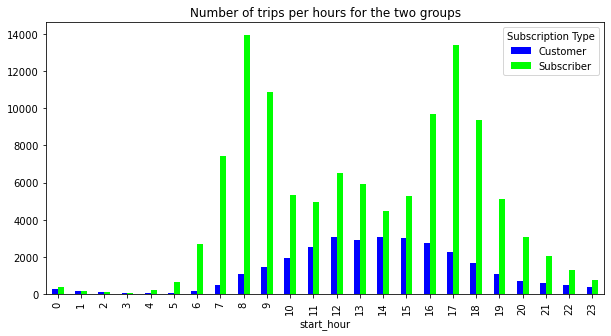

In [62]:
by_type_hour_pivot.plot(kind='bar', title = 'Number of trips per hours for the two groups', 
                        figsize = (10,5), colormap='brg');


### 7 - check yourself
Your chart should be similar to this:
<img src="exc7_chart.png">

### 8 - exercise

Ok, it looks like that Subscribers use the bikes for commuting while Customers use the bikes more during the day. Let's see if these patterns are different in the weekend and on weekdays! <br>
As we are about to introduce a new grouping variable we can't use the aggregated data we created in the last tasks. So let's go back to the trip dataframe and create a new column called day_of_week with the name of the day of the start_date. Remember you can use the built-in methods of the .dt properties of the datetime like columns. 

In [63]:
# week name
trip['day_of_week'] = trip['start_date'].dt.strftime("%A") 
# day count

#trip["day_of_week"] = trip["start_date"].dt.dayofweek
trip.head(5)

trip.head()


,Trip ID,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,start_date,start_hour,day_of_week
0,4576,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,2013-08-29 14:13:00,14,Thursday
1,4607,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,2013-08-29 14:42:00,14,Thursday
2,4130,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,2013-08-29 10:16:00,10,Thursday
3,4251,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,2013-08-29 11:29:00,11,Thursday
4,4299,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,2013-08-29 12:02:00,12,Thursday


### 8 - check yourself

In [64]:
if sorted(trip['day_of_week'].unique()) == ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']:
    print('the column creation was successfull')
else:
    print('the column creation was NOT successfull')      

the column creation was successfull


### 9 - exercise
We know the name of the days of each date now. Let's crate a column called weekend. If the name of the day is Saturday or Sunday, the value of weekend should be True. Otherwise it should be False.

In [65]:
trip['weekend'] = trip['day_of_week'].isin(['Saturday', 'Sunday'])
trip.head()

,Trip ID,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,start_date,start_hour,day_of_week,weekend
0,4576,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,2013-08-29 14:13:00,14,Thursday,False
1,4607,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,2013-08-29 14:42:00,14,Thursday,False
2,4130,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,2013-08-29 10:16:00,10,Thursday,False
3,4251,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,2013-08-29 11:29:00,11,Thursday,False
4,4299,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,2013-08-29 12:02:00,12,Thursday,False


### 9 - check yourself

In [66]:
if trip['weekend'].sum() == 22980:
    print('the column creation was successfull')
else:
    print('the column creation was NOT successfull')        

the column creation was successfull


### 10 - exercise
Create a figure with two charts next to each others. 
- One should show the number of trips by hours for Customers and Subsribers on the weekends and the other on the weekdays. 
- Both charts should have a title and they should have a shared y axes. 
- There should be a shared title in the middle above the charts <br><br>
For creating the charts you have to filter the trip data for weekend/weekday first and than pivot the new dataframe. <br><br>
As an advanced task you can make a figure with 4 plots: in the first row the weekends and weekdays should be separate charts with differenc colored bars for Customers and Subscribers. In the second row, the columns should be for the weekends/weekdays on separate charts for Customers and Subscribers. The charts should share both axes and only the charts on the left should have the legend explanation box

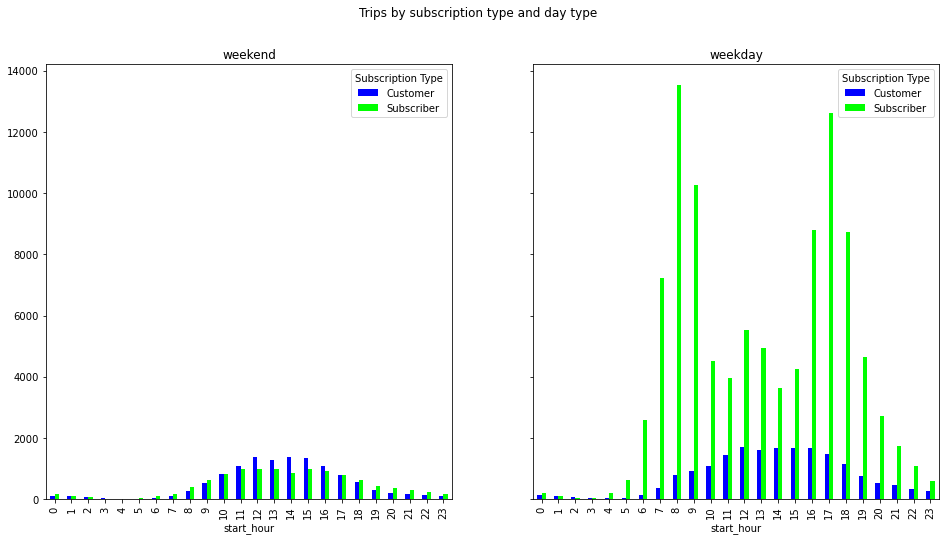

In [67]:
by_weekend_type_hour =trip.groupby(['weekend','Subscription Type', 'start_hour']).count().reset_index(
    )[['weekend','Subscription Type', 'start_hour','Trip ID']]


fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.suptitle('Trips by subscription type and day type')

by_weekend_type_hour[by_weekend_type_hour['weekend']==True].pivot(
    index='start_hour', columns='Subscription Type', values='Trip ID').plot(kind='bar', 
                                                                            title='weekend', colormap='brg',ax=axes[0], figsize=(16,8))
by_weekend_type_hour[by_weekend_type_hour['weekend']==False].pivot(
    index='start_hour', columns='Subscription Type', values='Trip ID').plot(kind='bar',
                                                                            title='weekday', colormap='brg',ax=axes[1],figsize=(16,8));

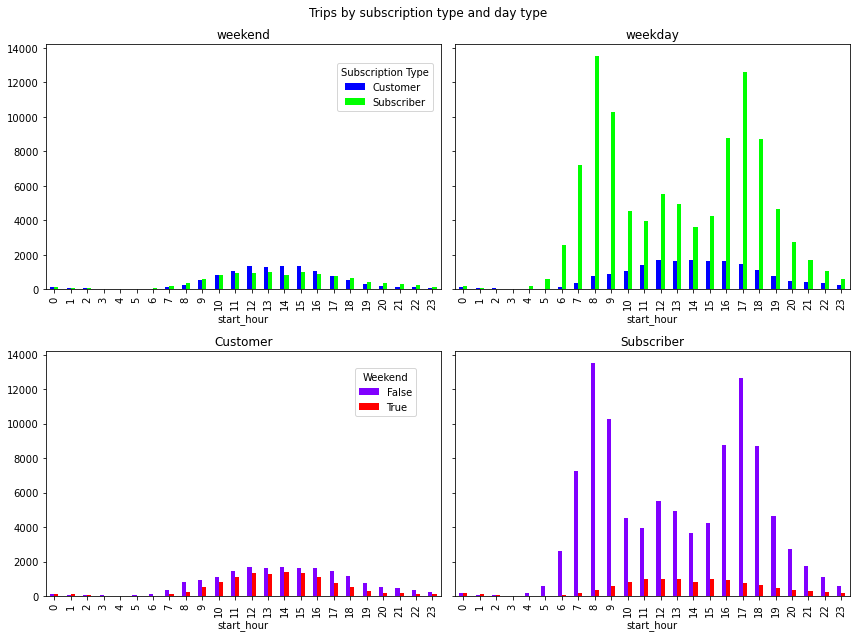

In [68]:
# Advanced

fig, axes = plt.subplots(nrows=2, ncols=2,sharey=True, figsize=(12,9))
fig.suptitle('Trips by subscription type and day type')


by_weekend_type_hour[by_weekend_type_hour['weekend']==True].pivot(
    index='start_hour', columns='Subscription Type', values='Trip ID').plot(kind='bar', 
                                                                            title='weekend', colormap='brg',ax=axes[0,0], legend=None)
by_weekend_type_hour[by_weekend_type_hour['weekend']==False].pivot(
    index='start_hour', columns='Subscription Type', values='Trip ID').plot(kind='bar',
                                                                            title='weekday', colormap='brg',ax=axes[0,1],legend=None)

by_weekend_type_hour[by_weekend_type_hour['Subscription Type']=='Customer'].pivot(
    index='start_hour', columns='weekend', values='Trip ID').plot(kind='bar', 
                                                                            title='Customer', colormap='rainbow',ax=axes[1,0],legend=None)

by_weekend_type_hour[by_weekend_type_hour['Subscription Type']=='Subscriber'].pivot(
    index='start_hour', columns='weekend', values='Trip ID').plot(kind='bar', 
                                                                            title='Subscriber', colormap='rainbow',ax=axes[1,1],legend=None)


labels_handles = {
  label: handle for ax in fig.axes[0:2] for handle, label in zip(*ax.get_legend_handles_labels())
}

fig.legend(
  labels_handles.values(),
  labels_handles.keys(),
  loc="upper center",
  bbox_to_anchor=(0.45, 0.9),
  bbox_transform=plt.gcf().transFigure,
  title="Subscription Type"
)

labels_handles = {
  label: handle for ax in fig.axes[2:4] for handle, label in zip(*ax.get_legend_handles_labels())
}

fig.legend(
  labels_handles.values(),
  labels_handles.keys(),
  loc="upper center",
  bbox_to_anchor=(0.45, 0.43),
  bbox_transform=plt.gcf().transFigure,
  title="Weekend"
)
fig.tight_layout()


### 7 - check yourself
Your chart should be similar to this:
<img src="exc10_chart.png">
<br><br>Or to this if you chose the advanced task:
<img src="exc10_chart_advance.png">

### +1 - exercise
Include the month of the start_date in the analysis and create a figure showing some insight. <br>
Save the figure as a picture.

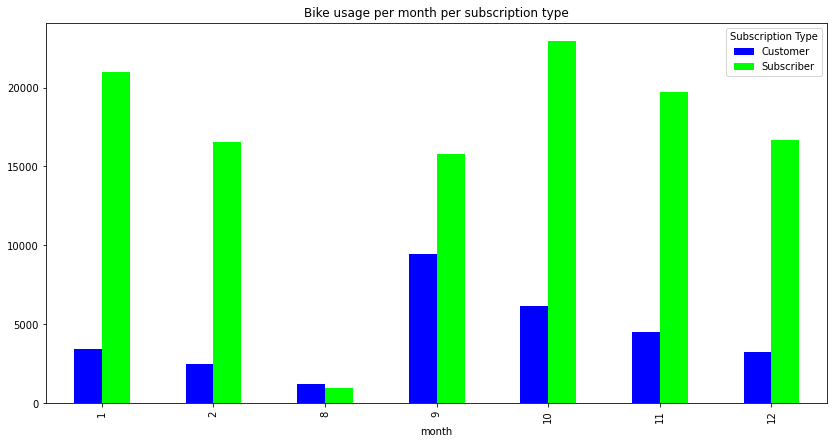

In [85]:

trip['month']=trip['start_date'].dt.month
by_type_month =trip.groupby(['Subscription Type', 'month']).count().reset_index()[['Subscription Type', 'month', 'Trip ID']].rename(columns={'Trip ID':'Count'})
by_type_month_pivot=by_type_month.pivot(index='month', columns='Subscription Type', values='Count')
by_type_month_pivot.plot(kind='bar',title='Bike usage per month per subscription type', colormap='brg', figsize=(14,7))
# There is no data from March to July or htey do not use bikes
# In August there are more customer than subscriber
plt.savefig('monthly.png',bbox_inches='tight')